##Practical 3: Decision tree on titanic dataset
##12 A1 Snehal Rakas

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('titanic.csv')

In [ ]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

In [ ]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

In [ ]:
data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)


In [ ]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


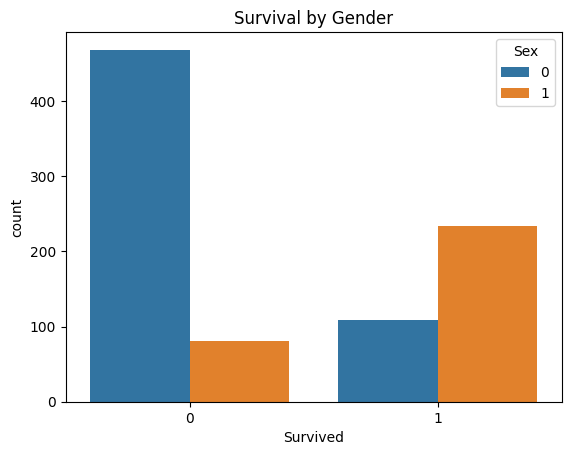

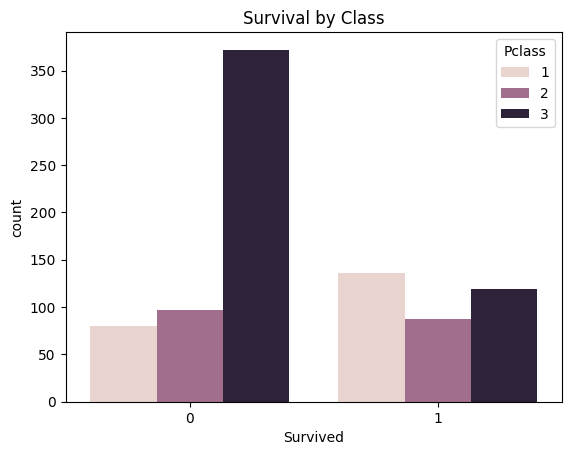

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title('Survival by Gender')
plt.show()

sns.countplot(x='Survived', hue='Pclass', data=data)
plt.title('Survival by Class')
plt.show()


In [ ]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Accuracy: 0.7877094972067039
Confusion Matrix:
[[86 19]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

AUC: 0.8014800514800515


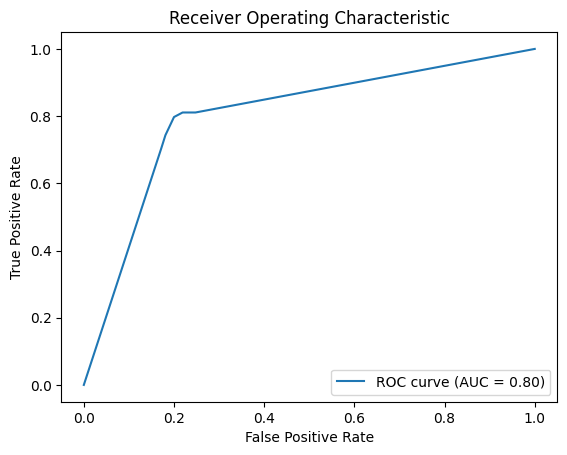

In [ ]:
y_pred = tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_report(y_test, y_pred))
y_pred_prob = tree_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC: {auc}')
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


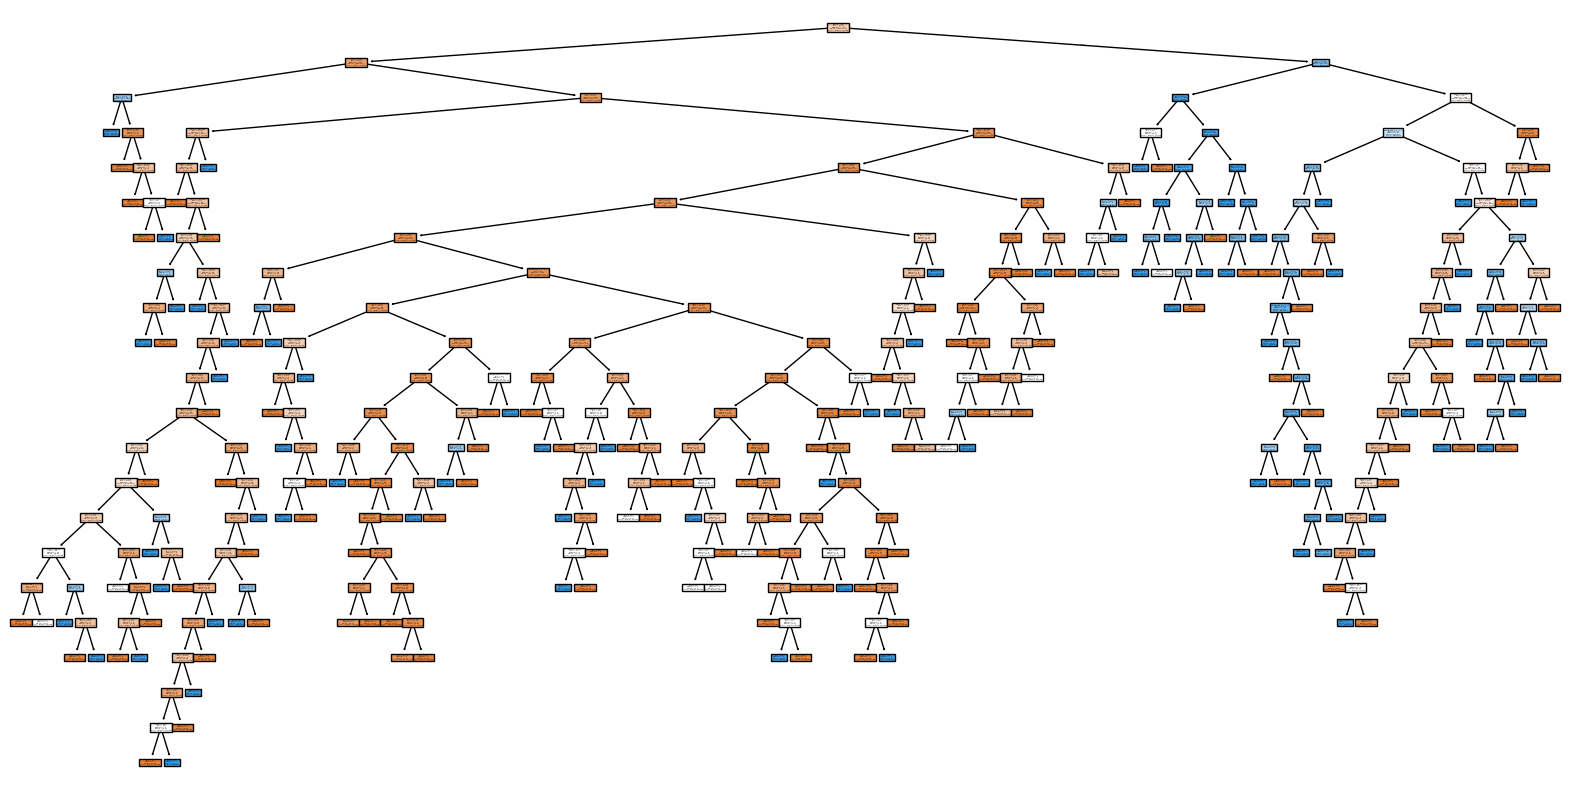

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=X.columns, class_names=['Did not survive', 'Survived'], filled=True)
plt.show()


In [ ]:
tree_model_tuned = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model_tuned.fit(X_train, y_train)

y_pred_tuned = tree_model_tuned.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f'Accuracy (Tuned Model): {accuracy_tuned}')


Accuracy (Tuned Model): 0.7988826815642458
